In [20]:
#import libs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
from matplotlib import ticker
from matplotlib import rcParams
from matplotlib import patches
import xarray as xr
import scipy.io
import astropy.constants as const
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
import pandas as pd
import fitting_template
import importlib
#from IPython.display import display, Math
from astropy.modeling import models, fitting, Fittable1DModel, Parameter
from scipy.optimize import curve_fit
importlib.reload(fitting_template)
import fitting_template
from fitting_template import FeXII_fit
from fitting_template import myGaussian1D

In [21]:
#read dataset
awsom_data_set = scipy.io.readsav('../save/awsom_new.sav',verbose = True,python_dict=True)

--------------------------------------------------
Date: Sun Aug 23 03:27:20 2020
User: yjzhu
Host: Yingjies-MacBook-Pro.local
--------------------------------------------------
Format: 11
Architecture: x86_64
Operating System: darwin
IDL Version: 8.2
--------------------------------------------------
Successfully read 5 records of which:
 - 1 are of type VERSION
 - 1 are of type TIMESTAMP
 - 2 are of type VARIABLE
--------------------------------------------------
Available variables:
 - x [<class 'numpy.ndarray'>]
 - w [<class 'numpy.ndarray'>]
--------------------------------------------------


In [3]:
awsom_data_set['x'].shape

(3, 61, 2, 1364)

In [22]:
awsom_wvl = awsom_data_set['x'][0,0,0,:]
awsom_int = awsom_data_set['w']

In [91]:
np.abs(awsom_wvl - 202.044).argmin()
#Fe VIII 185 237
#Fe VIII 186 300
#Fe XII 195 687
#Fe XII 192 563
#Fe XII 193 614
#Fe XIII 202 1002

1002

In [23]:
awsom_wvl_195 = awsom_wvl[679:696]
%store awsom_wvl_195

Stored 'awsom_wvl_195' (ndarray)


In [24]:
awsom_z = awsom_data_set['x'][2,:,0,0]
awsom_x = awsom_data_set['x'][1,0,:,0]

In [25]:
FeXII_195 = FeXII_fit(awsom_int[:,0,679:696],awsom_wvl[679:696],[1,195.12,0.02,0],err = np.ones_like(awsom_int[:,0,679:696])*1e-5)
FeXII_195.run_lse()
#FeXII_195.plot()

In [26]:
FeXII_192 = FeXII_fit(awsom_int[:,0,555:572],awsom_wvl[555:572],[1,192.4,0.02,0],err=np.ones_like(awsom_int[:,0,555:572])*1e-5)
FeXII_192.run_lse()
#FeXII_192.plot()

In [27]:
FeXII_193 = FeXII_fit(awsom_int[:,0,606:621],awsom_wvl[606:621],[1,193.5,0.02,0],err=np.ones_like(awsom_int[:,0,606:621])*1e-5)
FeXII_193.run_lse()
#FeXII_193.plot()

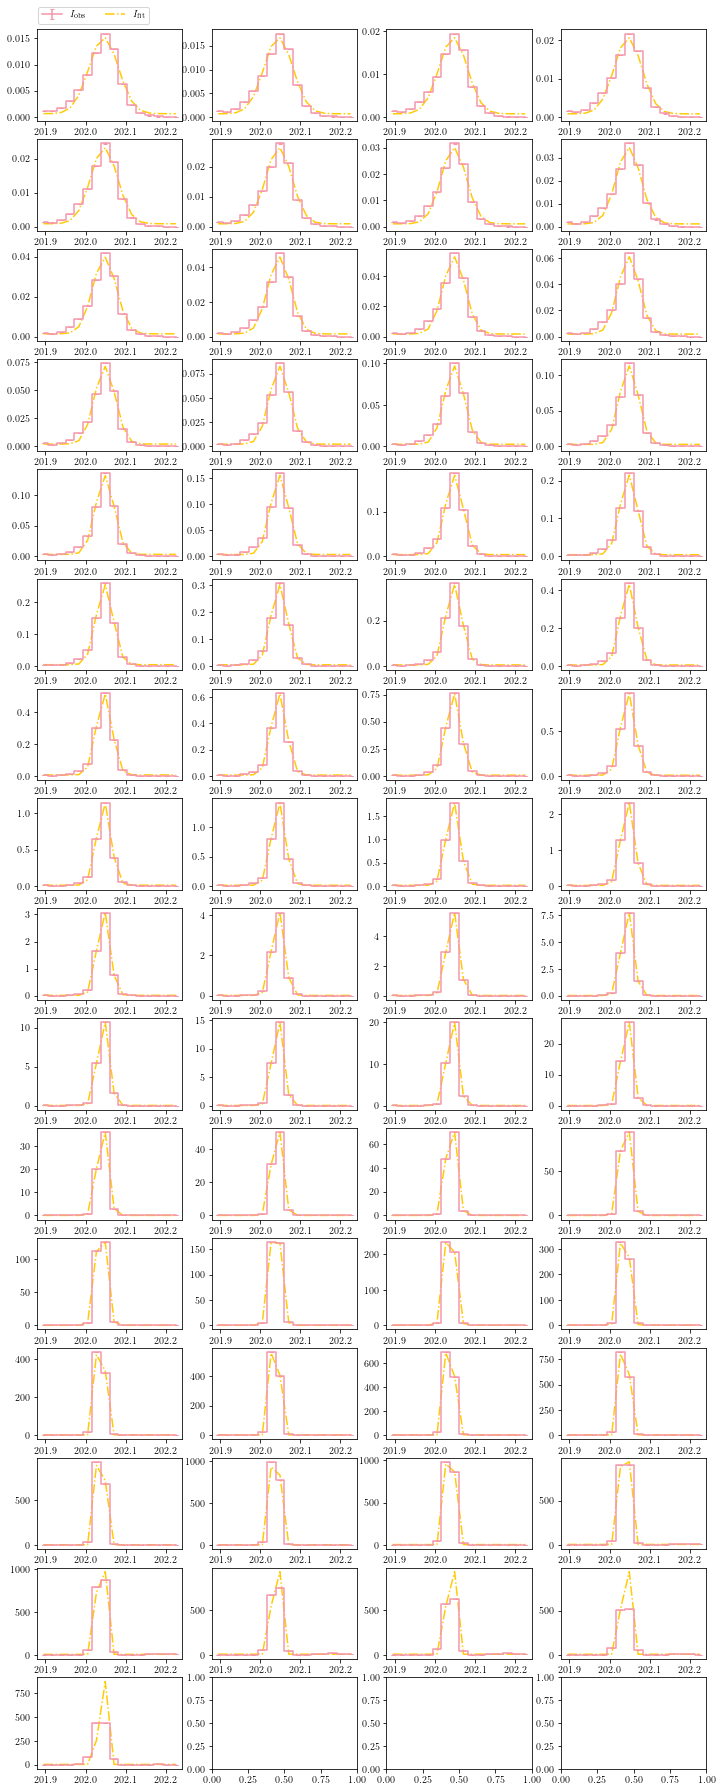

In [41]:
FeXIII_202 = FeXII_fit(awsom_int[:,0,995:1011],awsom_wvl[995:1011],[0.5,202.04,0.02,0],err=np.ones_like(awsom_int[:,0,995:1011])*1e-5)
FeXIII_202.run_lse()
FeXIII_202.plot()

In [29]:
awsom_192_fwhm = FeXII_192.get_para()[:,2]
awsom_192_fwhm_err = FeXII_192.get_error()[:,2]
awsom_193_fwhm = FeXII_193.get_para()[:,2]
awsom_193_fwhm_err = FeXII_193.get_error()[:,2]
awsom_195_fwhm = FeXII_195.get_para()[:,2]
awsom_195_fwhm_err = FeXII_195.get_error()[:,2]
awsom_202_fwhm = FeXIII_202.get_para()[:,2]
awsom_202_fwhm_err = FeXIII_202.get_error()[:,2]
awsom_195_int = FeXII_192.get_para()[:,0]
awsom_195_cent = FeXII_195.get_para()[:,1]
awsom_195_cent_err = FeXII_195.get_error()[:,1]

In [30]:
%store awsom_z
%store awsom_192_fwhm
%store awsom_192_fwhm_err
%store awsom_193_fwhm
%store awsom_193_fwhm_err
%store awsom_195_fwhm
%store awsom_195_fwhm_err
%store awsom_202_fwhm
%store awsom_202_fwhm_err
%store awsom_195_int
%store awsom_195_cent
%store awsom_195_cent_err

Stored 'awsom_z' (ndarray)
Stored 'awsom_192_fwhm' (ndarray)
Stored 'awsom_192_fwhm_err' (ndarray)
Stored 'awsom_193_fwhm' (ndarray)
Stored 'awsom_193_fwhm_err' (ndarray)
Stored 'awsom_195_fwhm' (ndarray)
Stored 'awsom_195_fwhm_err' (ndarray)
Stored 'awsom_202_fwhm' (ndarray)
Stored 'awsom_202_fwhm_err' (ndarray)
Stored 'awsom_195_int' (ndarray)
Stored 'awsom_195_cent' (ndarray)
Stored 'awsom_195_cent_err' (ndarray)


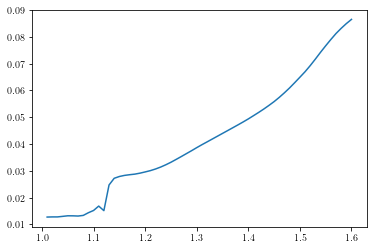

In [31]:
plt.plot(-awsom_z[:-1],awsom_202_fwhm[:-1])

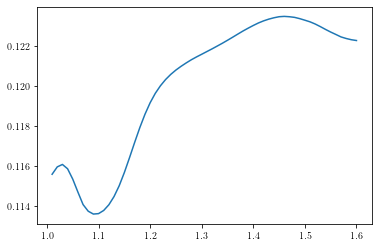

In [29]:
plt.plot(-awsom_z[:-1],awsom_195_cent[:-1]-195)

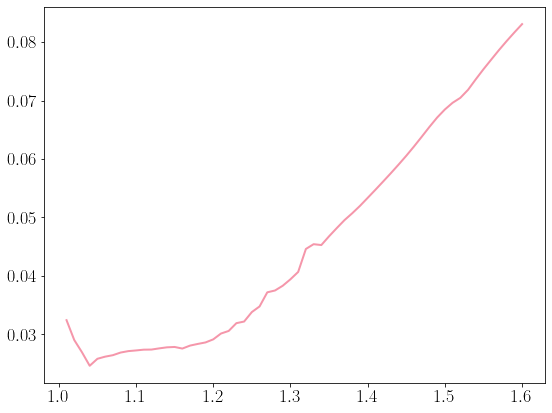

In [63]:
fig, ax = plt.subplots(figsize=(8,6))
ln, = ax.plot(-awsom_y[:-1],awsom_195_fwhm[:-1],color = '#F596AA',linewidth=2,label = '')
ax.set_xlabel(r'',fontsize=24)
ax.set_ylabel(r'',fontsize=24)
ax.tick_params(labelsize=18)
plt.subplots_adjust(bottom = 0.1,left=0.1,top=0.97,right=0.97)

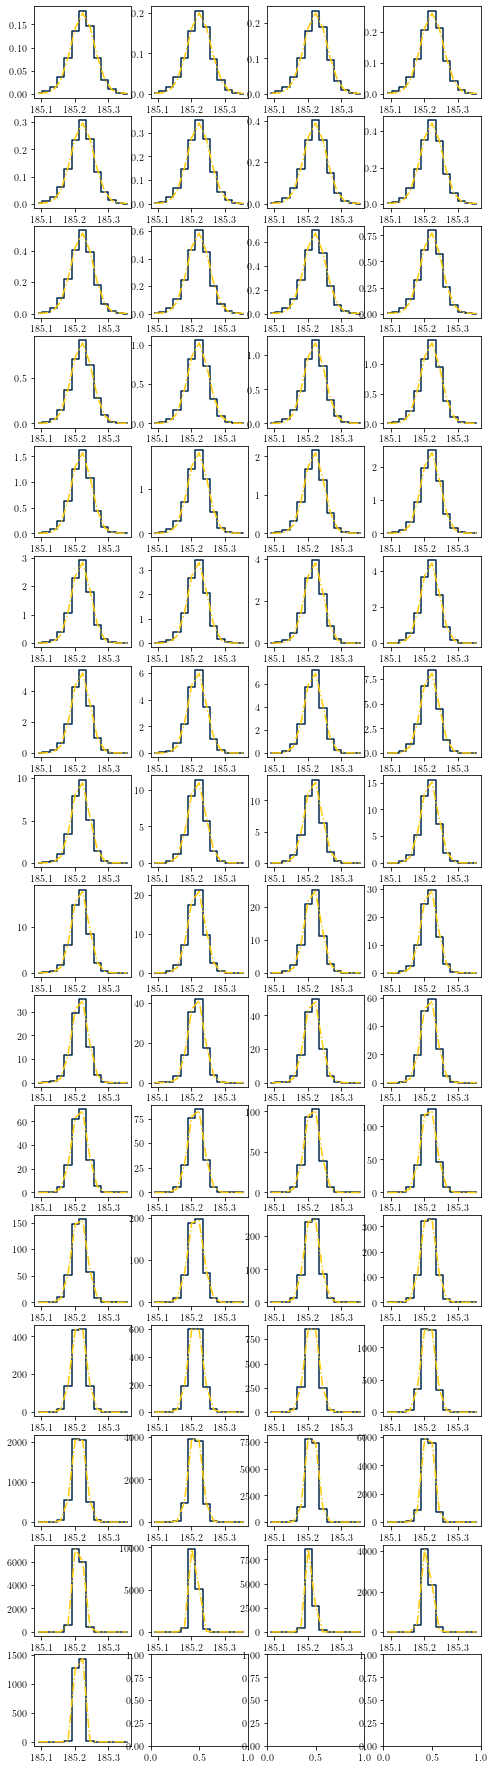

In [43]:
FeVIII_185 = FeXII_fit(awsom_int[:,10,231:244],awsom_wvl[231:244],[1,185.21,0.02,0.5])
FeVIII_185.run_lsq()
FeVIII_185.plot()

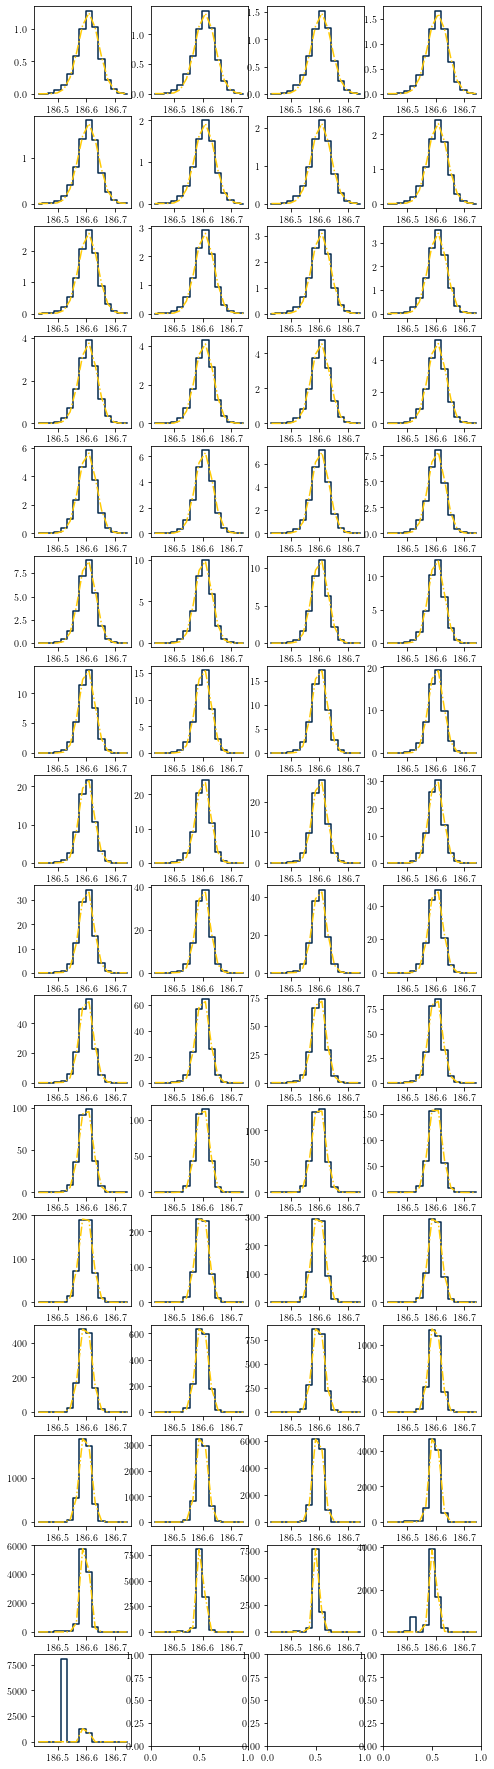

In [45]:
FeVIII_186 = FeXII_fit(awsom_int[:,10,292:307],awsom_wvl[292:307],[1,186.6,0.02,0.5])
FeVIII_186.run_lsq()
FeVIII_186.plot()

In [49]:
int_185 = np.array([  p_[1] for p_ in FeVIII_185.get_para()])
int_186 = np.array([  p_[1] for p_ in FeVIII_186.get_para()])
awsom_186_185 = int_186/int_185

In [67]:
%store awsom_186_185

Stored 'awsom_186_185' (ndarray)


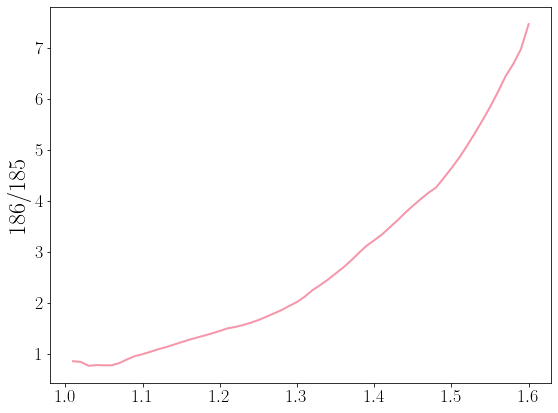

In [70]:
fig, ax = plt.subplots(figsize=(8,6))
ln, = ax.plot(-awsom_y[:-1],awsom_186_185[:-1],color = '#F596AA',linewidth=2,label = '')
ax.set_xlabel(r'',fontsize=24)
ax.set_ylabel(r'186/185',fontsize=24)
ax.tick_params(labelsize=18)
plt.subplots_adjust(bottom = 0.1,left=0.1,top=0.97,right=0.97)

In [73]:
#2D width
width_195_2d = np.zeros((61,21))
for ii in range(21):
    FeXII_195_ii = FeXII_fit(awsom_int[:,ii,681:694],awsom_wvl[681:694],[1,195.12,0.02,0.5])
    FeXII_195_ii.run_lsq()
    width_195_2d[:,ii] = np.array([  p_[2] for p_ in FeXII_195_ii.get_para()])

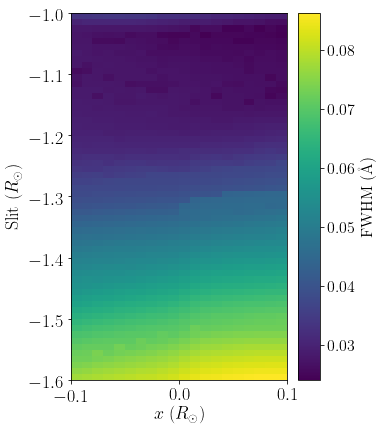

In [90]:
fig, ax = plt.subplots(figsize=(6,6))
im = ax.pcolormesh(awsom_x,awsom_y,width_195_2d)
ax.set_xlabel(r'$x\ (R_\odot)$',fontsize=18)
ax.set_ylabel(r'Slit $(R_{\odot})$',fontsize=18)
ax.tick_params(labelsize=18)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
clb_ax = inset_axes(ax,width="10%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.05, 0., 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0)
clb = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=ax,cax=clb_ax)
clb_ax.tick_params(labelsize=16)
clb_ax.yaxis.get_offset_text().set_fontsize(16)
clb_ax.set_ylabel(r'FWHM ($\mathrm{\AA})$',fontsize=16)
plt.subplots_adjust(bottom = 0.12,left=0.2,top=0.97,right=0.7)
plt.savefig(fname = '../figs/fwhm.pdf', dpi = 300, format = 'pdf')
plt.savefig(fname = '../figs/fwhm.png', dpi = 300, format = 'png')